In [1]:
!git clone https://github.com/rbrtwlz/fastai_object_detection

Cloning into 'fastai_object_detection'...
remote: Enumerating objects: 826, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 826 (delta 12), reused 11 (delta 7), pack-reused 788
Receiving objects: 100% (826/826), 20.30 MiB | 30.98 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [2]:
!pip install /content/fastai_object_detection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./fastai_object_detection
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/bes-dev/mean_average_precision to /tmp/pip-install-vtlp2cij/mean-average-precision_34a9da18f2144943af23ca419c2e3719
  Running command git clone --filter=blob:none --quiet https://github.com/bes-dev/mean_average_precision /tmp/pip-install-vtlp2cij/mean-average-precision_34a9da18f2144943af23ca419c2e3719
  Resolved https://github.com/bes-dev/mean_average_precision to commit c30ea439680416f600781022eb6f1f8032d88647
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.9/197.9 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 8.3 MB/s eta 0:00:00
  Created wheel

In [4]:
from fastai.vision.all import *
from fastai_object_detection.all import *
import os
import json

In [5]:
path, df = CocoData.create(ds_name="coco-cats-and-dogs", cat_list=["cat", "dog"], 
                           max_images=2000, with_mask=False)

Creating folders.
loading annotations into memory...
Done (t=26.40s)
creating index...
index created!
Found 2 valid categories.
['cat', 'dog']
Starting download.


3903 images downloaded.
Creating Dataframe...


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/datasets.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df)
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/datasets.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df)
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/datasets.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df)
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/datasets.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

In [6]:
dls = ObjectDetectionDataLoaders.from_df(df, bs=2, 
                                         item_tfms=[Resize(800, method="pad", pad_mode="zeros")], 
                                         batch_tfms=[Normalize.from_stats(*imagenet_stats)])

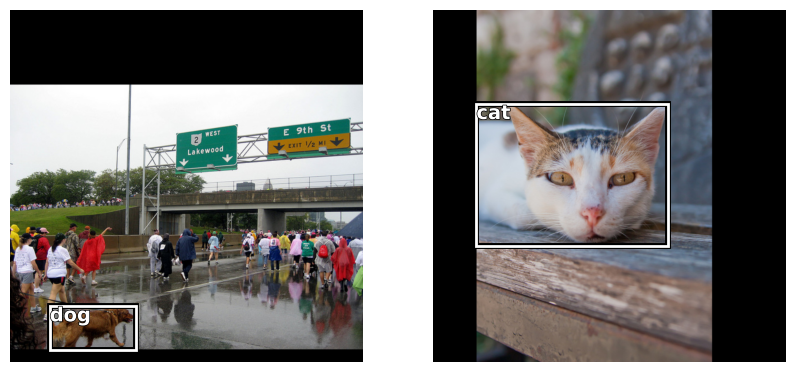

In [7]:
dls.show_batch(figsize=(10,10))

In [8]:
learn = fasterrcnn_learner(dls, fasterrcnn_resnet50, 
                           opt_func=SGD, lr=0.005, wd=0.0005, train_bn=False,
                           metrics=[mAP_at_IoU40, mAP_at_IoU60])
learn.freeze()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/fastai_object_detection/callbacks.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x1 = torch.tensor(x1)
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/callbacks.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y[k] = [torch.tensor(e) for e in yb[i]]


SuggestedLRs(valley=0.0030199517495930195)

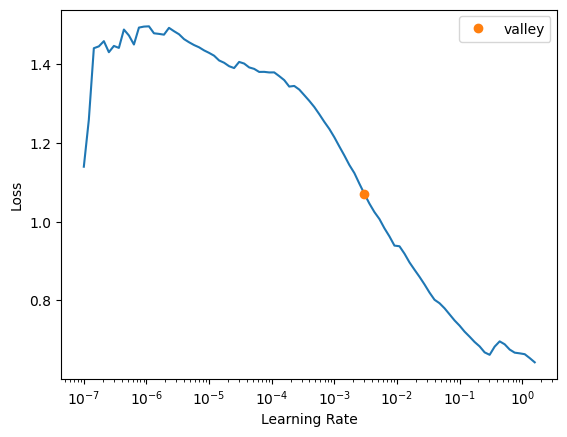

In [9]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(3, 1.2e-03)

epoch,train_loss,valid_loss,mAP@IoU>0.4,mAP@IoU>0.6,time
0,0.193861,0.201537,0.672099,0.614923,08:24
1,0.156360,0.163953,0.694850,0.663938,08:23


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/external/mean_average_precision_source.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.match_table[c] = self.match_table[c].append(match_table)
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/external/mean_average_precision_source.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.match_table[c] = self.match_table[c].append(match_table)
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/external/mean_average_precision_source.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.match_table[c] = self.match_table[c].append(match_table)
/usr/local/lib/python3.10

epoch,train_loss,valid_loss,mAP@IoU>0.4,mAP@IoU>0.6,time
0,0.193861,0.201537,0.672099,0.614923,08:24
1,0.156360,0.163953,0.694850,0.663938,08:23


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/callbacks.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x1 = torch.tensor(x1)
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/callbacks.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y[k] = [torch.tensor(e) for e in yb[i]]
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/external/mean_average_precision_source.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.match_table[c] = self.match_table[c].append(match_table)
/usr/local/lib/python

In [11]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(3, 1.2e-03)

epoch,train_loss,valid_loss,mAP@IoU>0.4,mAP@IoU>0.6,time
0,0.142409,0.148579,0.718009,0.692056,14:27


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/callbacks.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x1 = torch.tensor(x1)
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/callbacks.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y[k] = [torch.tensor(e) for e in yb[i]]
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/external/mean_average_precision_source.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.match_table[c] = self.match_table[c].append(match_table)
/usr/local/lib/python

epoch,train_loss,valid_loss,mAP@IoU>0.4,mAP@IoU>0.6,time
0,0.142409,0.148579,0.718009,0.692056,14:27


/usr/local/lib/python3.10/dist-packages/fastai_object_detection/external/mean_average_precision_source.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.match_table[c] = self.match_table[c].append(match_table)
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/external/mean_average_precision_source.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.match_table[c] = self.match_table[c].append(match_table)
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/external/mean_average_precision_source.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.match_table[c] = self.match_table[c].append(match_table)
/usr/local/lib/python3.10/dist-packages/fastai_object_detection/external/mea